In [1]:
#Import dependencies
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#read file to dataframe
file = os.path.join("..","..","pollution_us_2000_2016.csv")
df = pd.read_csv(file)
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [3]:
#Drop irrelevant columns
df = df.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [4]:
#Clean the dataframe
cleanDF = df[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
#Drop NaN
cleanDF = cleanDF.dropna(axis='rows') 
#Remove Mexico
cleanDF = cleanDF[cleanDF.State!='Country Of Mexico']
#Convert date format
cleanDF['Date Local'] = pd.to_datetime(cleanDF['Date Local'],format='%Y-%m-%d')
#Groupby mean
cleanDF = cleanDF.groupby(['State','Date Local']).mean()
cleanDFgroup = cleanDF.groupby(level=0)
cleanDF

NO2 AQI  O3 AQI  SO2 AQI  CO AQI
State   Date Local                                  
Alabama 2013-12-01     37.0    24.0      1.0     6.0
        2013-12-02     30.0    12.0      3.0     6.0
        2013-12-03     21.0    11.0      3.0     3.0
        2013-12-04     18.0    13.0      1.0     2.0
        2013-12-05     15.0    13.0      1.0     2.0
        2013-12-06      9.0     6.0      0.0     2.0
        2013-12-07      8.0     9.0      0.0     2.0
        2013-12-08      9.0     0.0      4.0     3.0
        2013-12-09      8.0     7.0      0.0     3.0
        2013-12-10     26.0    19.0      1.0     3.0
        2013-12-11     26.0    17.0     17.0     5.0
        2013-12-12     26.0    25.0     11.0     3.0
        2013-12-13     33.0    18.0     17.0     6.0
        2013-12-14     20.0    20.0      7.0     2.0
        2013-12-15      8.0    20.0      0.0     1.0
        2013-12-16     38.0    19.0      1.0     6.0
        2013-12-17     33.0    30.0      1.0     7.0
        2013-12-18     37.0    25.0     16.0     3.0
        2013-12-19     28.0    28.0      4.0     9.0
        2013-12-20     13.0    28.0      3.0     2.0
        2013-12-21      8.0    24.0      0.0     1.0
        2013-12-22     13.0    27.0      1.0     2.0
        2013-12-23      7.0    18.0      0.0     2.0
        2013-12-24      8.0    27.0      0.0     3.0
        2013-12-25     22.0    26.0      7.0     6.0
        2013-12-26     25.0    28.0     50.0     8.0
        2013-12-27     27.0    26.0     27.0     6.0
        2013-12-28     24.0    15.0     11.0     7.0
        2013-12-29     24.0    22.0      0.0     5.0
        2013-12-30     19.0    10.0      6.0     6.0
...                     ...     ...      ...     ...
Wyoming 2016-03-01      3.0    43.0      0.0     1.0
        2016-03-02      1.0    44.0      0.0     1.0
        2016-03-03     10.0    48.0      0.0     2.0
        2016-03-04     16.0    41.0      0.0     1.0
        2016-03-05     33.0    41.0      1.0     1.0
        2016-03-06      3.0    45.0      0.0     1.0
        2016-03-07     11.0    36.0      0.0     1.0
        2016-03-08      8.0    40.0      0.0     1.0
        2016-03-09     18.0    42.0      0.0     1.0
        2016-03-11     19.0    45.0      0.0     1.0
        2016-03-12     10.0    43.0      4.0     1.0
        2016-03-13      3.0    43.0      0.0     1.0
        2016-03-14     17.0    45.0      0.0     1.0
        2016-03-15      1.0    41.0      0.0     1.0
        2016-03-16      2.0    44.0      0.0     1.0
        2016-03-17      3.0    44.0      0.0     1.0
        2016-03-18      2.0    39.0      0.0     1.0
        2016-03-19      4.0    40.0      0.0     1.0
        2016-03-20     23.0    44.0      0.0     1.0
        2016-03-21     18.0    49.0      0.0     1.0
        2016-03-22     25.0    47.0      1.0     1.0
        2016-03-23      2.0    39.0      0.0     1.0
        2016-03-24      8.0    45.0      0.0     1.0
        2016-03-25      9.0    45.0      0.0     1.0
        2016-03-26     25.0    38.0      0.0     1.0
        2016-03-27     22.0    46.0      0.0     1.0
        2016-03-28     21.0    48.0      0.0     1.0
        2016-03-29      3.0    37.0      0.0     1.0
        2016-03-30      1.0    44.0      0.0     1.0
        2016-03-31      1.0    44.0      0.0     1.0

[144721 rows x 4 columns]

In [5]:
#Create NO2 DF with Max Values per year by State
no2df = cleanDF.reset_index()[['State','Date Local','NO2 AQI']]
no2df["Year"] = ""
no2df["Year"] = no2df["Date Local"].dt.year
stateList = no2df["State"].unique()
yearList=no2df["Year"].unique()
yearList.sort()
finalno2DF = pd.DataFrame({"States":stateList})
finalno2DF =finalno2DF.set_index("States")

for year in yearList:
    holdDF = pd.DataFrame()
    holdDF = holdDF.iloc[0:0]
    holdDF = no2df[no2df["Year"]==year]
    holdDF = holdDF.groupby(["State"]).max()
    finalno2DF[str(year)] = holdDF["NO2 AQI"]

finalno2DF

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
States,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,82.000000,45.000000,48.000000
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,83.000000,NaN
Arizona,92.000000,70.333333,67.000000,65.000000,60.500000,73.500000,61.750000,60.500000,63.666667,53.000000,53.500000,51.666667,54.500000,50.000000,52.500000,44.500000,49.000000
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,45.000000,45.000000,79.000000,64.000000,62.000000,45.000000,54.000000,54.000000,41.000000
California,56.818182,54.720000,54.807692,65.200000,48.590909,51.166667,50.478261,51.379310,46.551724,46.916667,47.461538,44.040000,38.375000,42.440000,41.280000,33.478261,30.166667
Colorado,109.000000,102.000000,78.000000,108.000000,103.000000,87.500000,82.500000,89.000000,85.500000,83.000000,61.000000,77.000000,76.000000,69.000000,78.333333,72.666667,70.666667
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,74.000000,55.333333,100.000000,74.000000,70.000000,51.500000,32.000000,52.000000,48.000000,60.500000,NaN
Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,53.000000,44.000000,52.000000,41.000000,58.000000
District Of Columbia,109.000000,88.000000,101.000000,101.000000,104.000000,104.000000,104.000000,81.000000,101.000000,82.000000,85.000000,61.000000,53.000000,63.000000,53.000000,60.000000,55.000000


In [6]:
#Create O3 DF with max values by state
o3df = cleanDF.reset_index()[['State','Date Local','O3 AQI']]
o3df["Year"] = ""
o3df["Year"] = o3df["Date Local"].dt.year
stateList = o3df["State"].unique()
yearList=o3df["Year"].unique()
yearList.sort()
finalo3df = pd.DataFrame({"States":stateList})
finalo3df =finalo3df.set_index("States")

for year in yearList:
    holdDF = pd.DataFrame()
    holdDF = holdDF.iloc[0:0]
    holdDF = o3df[o3df["Year"]==year]
    holdDF = holdDF.groupby(["State"]).max()
    finalo3df[str(year)] = holdDF["O3 AQI"]

finalo3df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
States,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,90.000000,147.000000,112.000000
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,47.000000,NaN
Arizona,109.500000,89.000000,110.500000,106.000000,88.500000,99.500000,117.500000,89.333333,97.000000,84.000000,94.666667,89.000000,119.000000,120.666667,122.000000,104.666667,56.000000
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.000000,100.000000,124.000000,87.000000,119.000000,122.000000,93.000000,100.000000,97.000000,46.000000
California,70.565217,76.360000,73.923077,70.173913,89.280000,65.291667,70.541667,66.074074,75.037037,72.217391,76.346154,76.185185,75.450000,85.833333,99.666667,87.409091,72.666667
Colorado,71.000000,71.000000,97.000000,84.000000,84.000000,87.000000,100.500000,87.000000,124.000000,106.000000,77.000000,135.000000,127.000000,96.200000,99.333333,106.000000,46.000000
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,119.000000,126.666667,136.000000,85.500000,108.333333,123.333333,127.000000,122.666667,127.500000,135.000000,NaN
Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.000000,127.000000,93.000000,143.000000,105.000000,61.000000
District Of Columbia,164.000000,164.000000,206.000000,179.000000,119.000000,135.000000,145.000000,140.000000,142.000000,111.000000,151.000000,124.000000,124.000000,90.000000,133.000000,126.000000,93.000000


In [7]:
#import animation and cartopy dependencies
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.animation as animation
from matplotlib import colors
%matplotlib inline

MovieWriter imagemagick unavailable. Trying to use pillow instead.


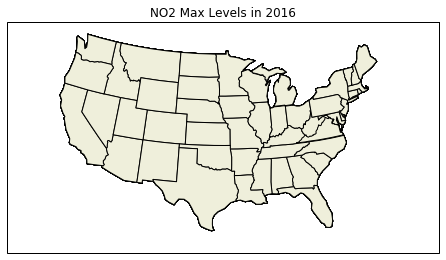

In [24]:
######### Animation time! for NO2

fig=plt.figure()
ax = plt.axes([0,0,1,1],projection=ccrs.LambertConformal())
ax.set_extent([-125,-66.5,20,50],ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

facecolor = [0.9375, 0.9375, 0.859375]
edgecolor = 'black'

def init_run():
    for state in shpreader.Reader(states_shp).records():
        ax.add_geometries([state.geometry], ccrs.PlateCarree(),facecolor=facecolor, edgecolor=edgecolor)

def run(data):
    year = 2000 + data
    for state in shpreader.Reader(states_shp).records():
        try:
            state_poll = finalno2DF.loc[state.attributes['name'],str(year)]
        except:
            state_poll = 0

        if state_poll == 0:
            facecolor = "white"
        elif state_poll < 51:
            facecolor = "green"
        elif state_poll < 101:
            facecolor = "yellow"
        elif state_poll < 151:
            facecolor = "orange"
        elif state_poll<201:
            facecolor = "red"
        elif state_poll < 301:
            facecolor = "purple"
        elif state_poll<501:
            facecolor = "brown"
        else:
            facecolor = "white"
        ax.add_geometries([state.geometry], ccrs.PlateCarree(),facecolor=facecolor, edgecolor=edgecolor)
    plt.title("NO2 Max Levels in " + str(year))
    return
ani = animation.FuncAnimation(fig, run, init_func=init_run,frames=17,interval=1000,blit=False)
# plt.show()
ani.save('no2mapAnim.gif', dpi=80, writer='imagemagick')


MovieWriter imagemagick unavailable. Trying to use pillow instead.


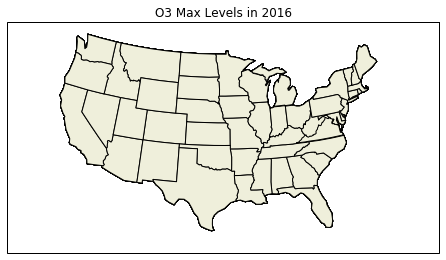

In [13]:
######### Animation time! for O3

fig=plt.figure()
ax = plt.axes([0,0,1,1],projection=ccrs.LambertConformal())
ax.set_extent([-125,-66.5,20,50],ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

facecolor = [0.9375, 0.9375, 0.859375]
edgecolor = 'black'

def init_run():
    for state in shpreader.Reader(states_shp).records():
        ax.add_geometries([state.geometry], ccrs.PlateCarree(),facecolor=facecolor, edgecolor=edgecolor)

def run(data):
    year = 2000 + data
    for state in shpreader.Reader(states_shp).records():
        try:
            state_poll = finalo3df.loc[state.attributes['name'],str(year)]
        except:
            state_poll = 0

        if state_poll == 0:
            facecolor = "white"
        elif state_poll < 51:
            facecolor = "green"
        elif state_poll < 101:
            facecolor = "yellow"
        elif state_poll < 151:
            facecolor = "orange"
        elif state_poll<201:
            facecolor = "red"
        elif state_poll < 301:
            facecolor = "purple"
        elif state_poll < 501:
            facecolor = "brown"
        else:
            facecolor = "white"
        ax.add_geometries([state.geometry], ccrs.PlateCarree(),facecolor=facecolor, edgecolor=edgecolor)
    plt.title("O3 Max Levels in " + str(year))
    return
ani = animation.FuncAnimation(fig, run, init_func=init_run,frames=17,interval=1000,blit=False)
# plt.show()
ani.save('o3mapAnim.gif', dpi=80, writer='imagemagick')


In [22]:
#Create SO2 DF with max values by state
so2df = cleanDF.reset_index()[['State','Date Local','SO2 AQI']]
so2df["Year"] = ""
so2df["Year"] = so2df["Date Local"].dt.year
stateList = so2df["State"].unique()
yearList=so2df["Year"].unique()
yearList.sort()
finalso2df = pd.DataFrame({"States":stateList})
finalso2df =finalso2df.set_index("States")

for year in yearList:
    holdDF = pd.DataFrame()
    holdDF = holdDF.iloc[0:0]
    holdDF = so2df[so2df["Year"]==year]
    holdDF = holdDF.groupby(["State"]).max()
    finalso2df[str(year)] = holdDF["SO2 AQI"]

finalso2df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
States,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,97.000000,69.000000,65.000000
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,72.000000,NaN
Arizona,21.000000,16.666667,16.666667,30.000000,24.0,19.250000,27.750000,12.000000,10.000000,25.000000,10.666667,10.000000,8.666667,8.000000,11.000000,7.333333,4.500000
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,52.000000,60.000000,19.000000,15.500000,27.500000,11.000000,15.000000,41.000000,7.000000
California,17.652174,13.038462,13.920000,14.173913,14.4,10.166667,10.409091,8.074074,9.172414,5.652174,5.636364,7.520000,6.739130,5.840000,7.272727,7.739130,4.500000
Colorado,100.000000,108.000000,107.000000,101.000000,79.0,60.000000,71.000000,91.500000,59.000000,64.000000,54.000000,57.000000,50.000000,54.500000,20.000000,21.000000,12.333333
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,89.000000,39.666667,81.000000,62.000000,56.000000,62.500000,20.000000,20.000000,13.500000,16.666667,NaN
Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,14.000000,11.000000,19.000000,14.000000,13.000000
District Of Columbia,104.000000,122.000000,96.000000,102.000000,107.0,100.000000,89.000000,70.000000,56.000000,79.000000,69.000000,49.000000,23.500000,13.000000,29.000000,26.000000,11.000000


MovieWriter imagemagick unavailable. Trying to use pillow instead.


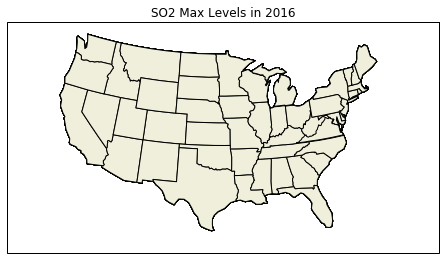

In [25]:
######### Animation time! for SO2

fig=plt.figure()
ax = plt.axes([0,0,1,1],projection=ccrs.LambertConformal())
ax.set_extent([-125,-66.5,20,50],ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

facecolor = [0.9375, 0.9375, 0.859375]
edgecolor = 'black'

def init_run():
    for state in shpreader.Reader(states_shp).records():
        ax.add_geometries([state.geometry], ccrs.PlateCarree(),facecolor=facecolor, edgecolor=edgecolor)

def run(data):
    year = 2000 + data
    for state in shpreader.Reader(states_shp).records():
        try:
            state_poll = finalso2df.loc[state.attributes['name'],str(year)]
        except:
            state_poll = 0

        if state_poll == 0:
            facecolor = "white"
        elif state_poll < 51:
            facecolor = "green"
        elif state_poll < 101:
            facecolor = "yellow"
        elif state_poll < 151:
            facecolor = "orange"
        elif state_poll<201:
            facecolor = "red"
        elif state_poll < 301:
            facecolor = "purple"
        elif state_poll < 501:
            facecolor = "brown"
        else:
            facecolor = "white"
        ax.add_geometries([state.geometry], ccrs.PlateCarree(),facecolor=facecolor, edgecolor=edgecolor)
    plt.title("SO2 Max Levels in " + str(year))
    return
ani = animation.FuncAnimation(fig, run, init_func=init_run,frames=17,interval=1000,blit=False)
# plt.show()
ani.save('SO2mapAnim.gif', dpi=80, writer='imagemagick')


In [27]:
#Create CO DF with max values by state
codf = cleanDF.reset_index()[['State','Date Local','CO AQI']]
codf["Year"] = ""
codf["Year"] = codf["Date Local"].dt.year
stateList = codf["State"].unique()
yearList=codf["Year"].unique()
yearList.sort()
finalcodf = pd.DataFrame({"States":stateList})
finalcodf =finalcodf.set_index("States")

for year in yearList:
    holdDF = pd.DataFrame()
    holdDF = holdDF.iloc[0:0]
    holdDF = codf[codf["Year"]==year]
    holdDF = holdDF.groupby(["State"]).max()
    finalcodf[str(year)] = holdDF["CO AQI"]

finalcodf

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
States,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,11.000000,9.000000,20.000000
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,43.000000,NaN
Arizona,38.333333,36.000000,32.500000,28.000000,25.666667,30.25,27.000000,22.250000,21.000000,17.250000,17.600000,18.000000,19.000000,17.666667,20.000000,16.000000,12.000000
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,20.000000,17.000000,17.000000,16.000000,17.500000,13.000000,13.500000,11.000000,10.000000
California,32.640000,27.520000,24.434783,27.192308,19.500000,21.25,18.565217,16.434783,14.379310,16.416667,13.000000,14.428571,15.000000,14.730769,14.840000,12.913043,8.466667
Colorado,34.000000,39.000000,28.000000,41.000000,33.000000,27.00,33.000000,26.000000,35.000000,23.000000,20.000000,23.000000,16.500000,25.333333,22.000000,22.333333,19.333333
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,10.500000,15.000000,17.000000,18.000000,11.000000,8.500000,10.500000,13.000000,9.000000,NaN
Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,13.000000,9.000000,13.000000,14.000000,16.000000
District Of Columbia,58.000000,54.000000,55.000000,51.000000,40.000000,38.00,39.000000,34.000000,36.000000,45.000000,40.000000,28.000000,25.000000,19.000000,17.000000,17.000000,9.000000


MovieWriter imagemagick unavailable. Trying to use pillow instead.


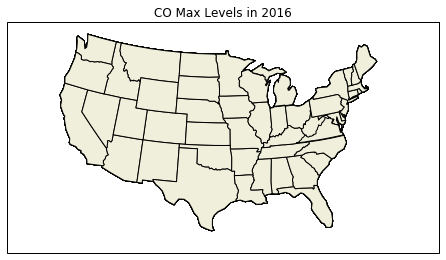

In [31]:
######### Animation time! for CO

fig=plt.figure()
ax = plt.axes([0,0,1,1],projection=ccrs.LambertConformal())
ax.set_extent([-125,-66.5,20,50],ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)

facecolor = [0.9375, 0.9375, 0.859375]
edgecolor = 'black'

def init_run():
    for state in shpreader.Reader(states_shp).records():
        ax.add_geometries([state.geometry], ccrs.PlateCarree(),facecolor=facecolor, edgecolor=edgecolor)

def run(data):
    year = 2000 + data
    for state in shpreader.Reader(states_shp).records():
        try:
            state_poll = finalcodf.loc[state.attributes['name'],str(year)]
        except:
            state_poll = 0

        if state_poll == 0:
            facecolor = "white"
        elif state_poll < 51:
            facecolor = "green"
        elif state_poll < 101:
            facecolor = "yellow"
        elif state_poll < 151:
            facecolor = "orange"
        elif state_poll<201:
            facecolor = "red"
        elif state_poll < 301:
            facecolor = "purple"
        elif state_poll < 501:
            facecolor = "brown"
        else:
            facecolor = "white"
        ax.add_geometries([state.geometry], ccrs.PlateCarree(),facecolor=facecolor, edgecolor=edgecolor)
    plt.title("CO Max Levels in " + str(year))
    return
ani = animation.FuncAnimation(fig, run, init_func=init_run,frames=17,interval=1000,blit=False,repeat=True)
# plt.show()
ani.save('COmapAnim.gif', dpi=80, writer='imagemagick')
